In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams ['figure.figsize'] = (10,5)
plt.rcParams ['figure.dpi']=250
sns.set_style('darkgrid')
import statsmodels.formula.api as smf

In [ ]:
df=pd.read_csv("/content/ToyotaCorolla - MLR.csv")

In [ ]:
df.head(10)

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
5,12950,32,61000,Diesel,90,0,2000,3,4,5,1170
6,16900,27,94612,Diesel,90,0,2000,3,4,5,1245
7,18600,30,75889,Diesel,90,0,2000,3,4,5,1245
8,21500,27,19700,Petrol,192,0,1800,3,4,5,1185
9,12950,23,71138,Diesel,69,0,1900,3,4,5,1105


In [ ]:
df.info() #no null values present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [ ]:
df.sample(10)

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
853,9000,68,65000,Petrol,110,0,1600,5,4,5,1070
847,10950,67,65785,Petrol,110,0,1600,5,4,5,1075
1410,8500,78,43622,Petrol,86,0,1300,4,4,5,1000
313,11650,39,37782,Petrol,97,0,1400,5,4,5,1060
711,8250,64,91333,Petrol,110,0,1600,3,4,5,1050
727,8900,59,86888,Petrol,110,0,1600,3,4,5,1050
794,11950,60,74720,Petrol,110,0,1600,5,4,5,1085
447,10995,49,74656,Diesel,69,0,1900,3,4,5,1105
554,11950,49,40836,Petrol,110,1,1600,3,4,5,1075
1273,5950,75,74567,Petrol,86,0,1300,3,4,5,1015


In [ ]:
df.shape #as we can observe we have 11 columns and 1436 rows

(1436, 11)

In [ ]:
df.dtypes #we have one object with us i.e 'Fuel_Type' which has to be convert into int

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [ ]:
df.columns.get_loc('Fuel_Type')

3

In [ ]:
from sklearn.preprocessing import LabelEncoder #converting fueltype column into integer using label encoding
labelencoder=LabelEncoder()
df['Fuel_Type']=labelencoder.fit_transform(df['Fuel_Type'])

In [ ]:
df['Fuel_Type'].value_counts() #cng-0,diesel=1,petrol-2

Fuel_Type
2    1264
1     155
0      17
Name: count, dtype: int64

In [ ]:
df.head(20)

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170
5,12950,32,61000,1,90,0,2000,3,4,5,1170
6,16900,27,94612,1,90,0,2000,3,4,5,1245
7,18600,30,75889,1,90,0,2000,3,4,5,1245
8,21500,27,19700,2,192,0,1800,3,4,5,1185
9,12950,23,71138,1,69,0,1900,3,4,5,1105


In [ ]:
df[df.duplicated()] #we have one duplicated row
df=df.drop_duplicates().reset_index(drop=True) #dropping duplicate value

In [ ]:
df.describe() #now they have also considered fuel type in statsitic calculations

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.0,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,1.868990,101.491986,0.055749,1576.560976,4.032753,4.0,5.026481,1072.287108
std,3608.732978,18.563312,37491.094553,0.370993,14.981408,0.229517,424.387533,0.952667,0.0,0.188575,52.251882
min,4350.000000,1.000000,1.000000,0.000000,69.000000,0.000000,1300.000000,2.000000,4.0,3.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,2.000000,90.000000,0.000000,1400.000000,3.000000,4.0,5.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,2.000000,110.000000,0.000000,1600.000000,4.000000,4.0,5.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,2.000000,110.000000,0.000000,1600.000000,5.000000,4.0,5.000000,1085.000000
max,32500.000000,80.000000,243000.000000,2.000000,192.000000,1.000000,16000.000000,5.000000,4.0,6.000000,1615.000000


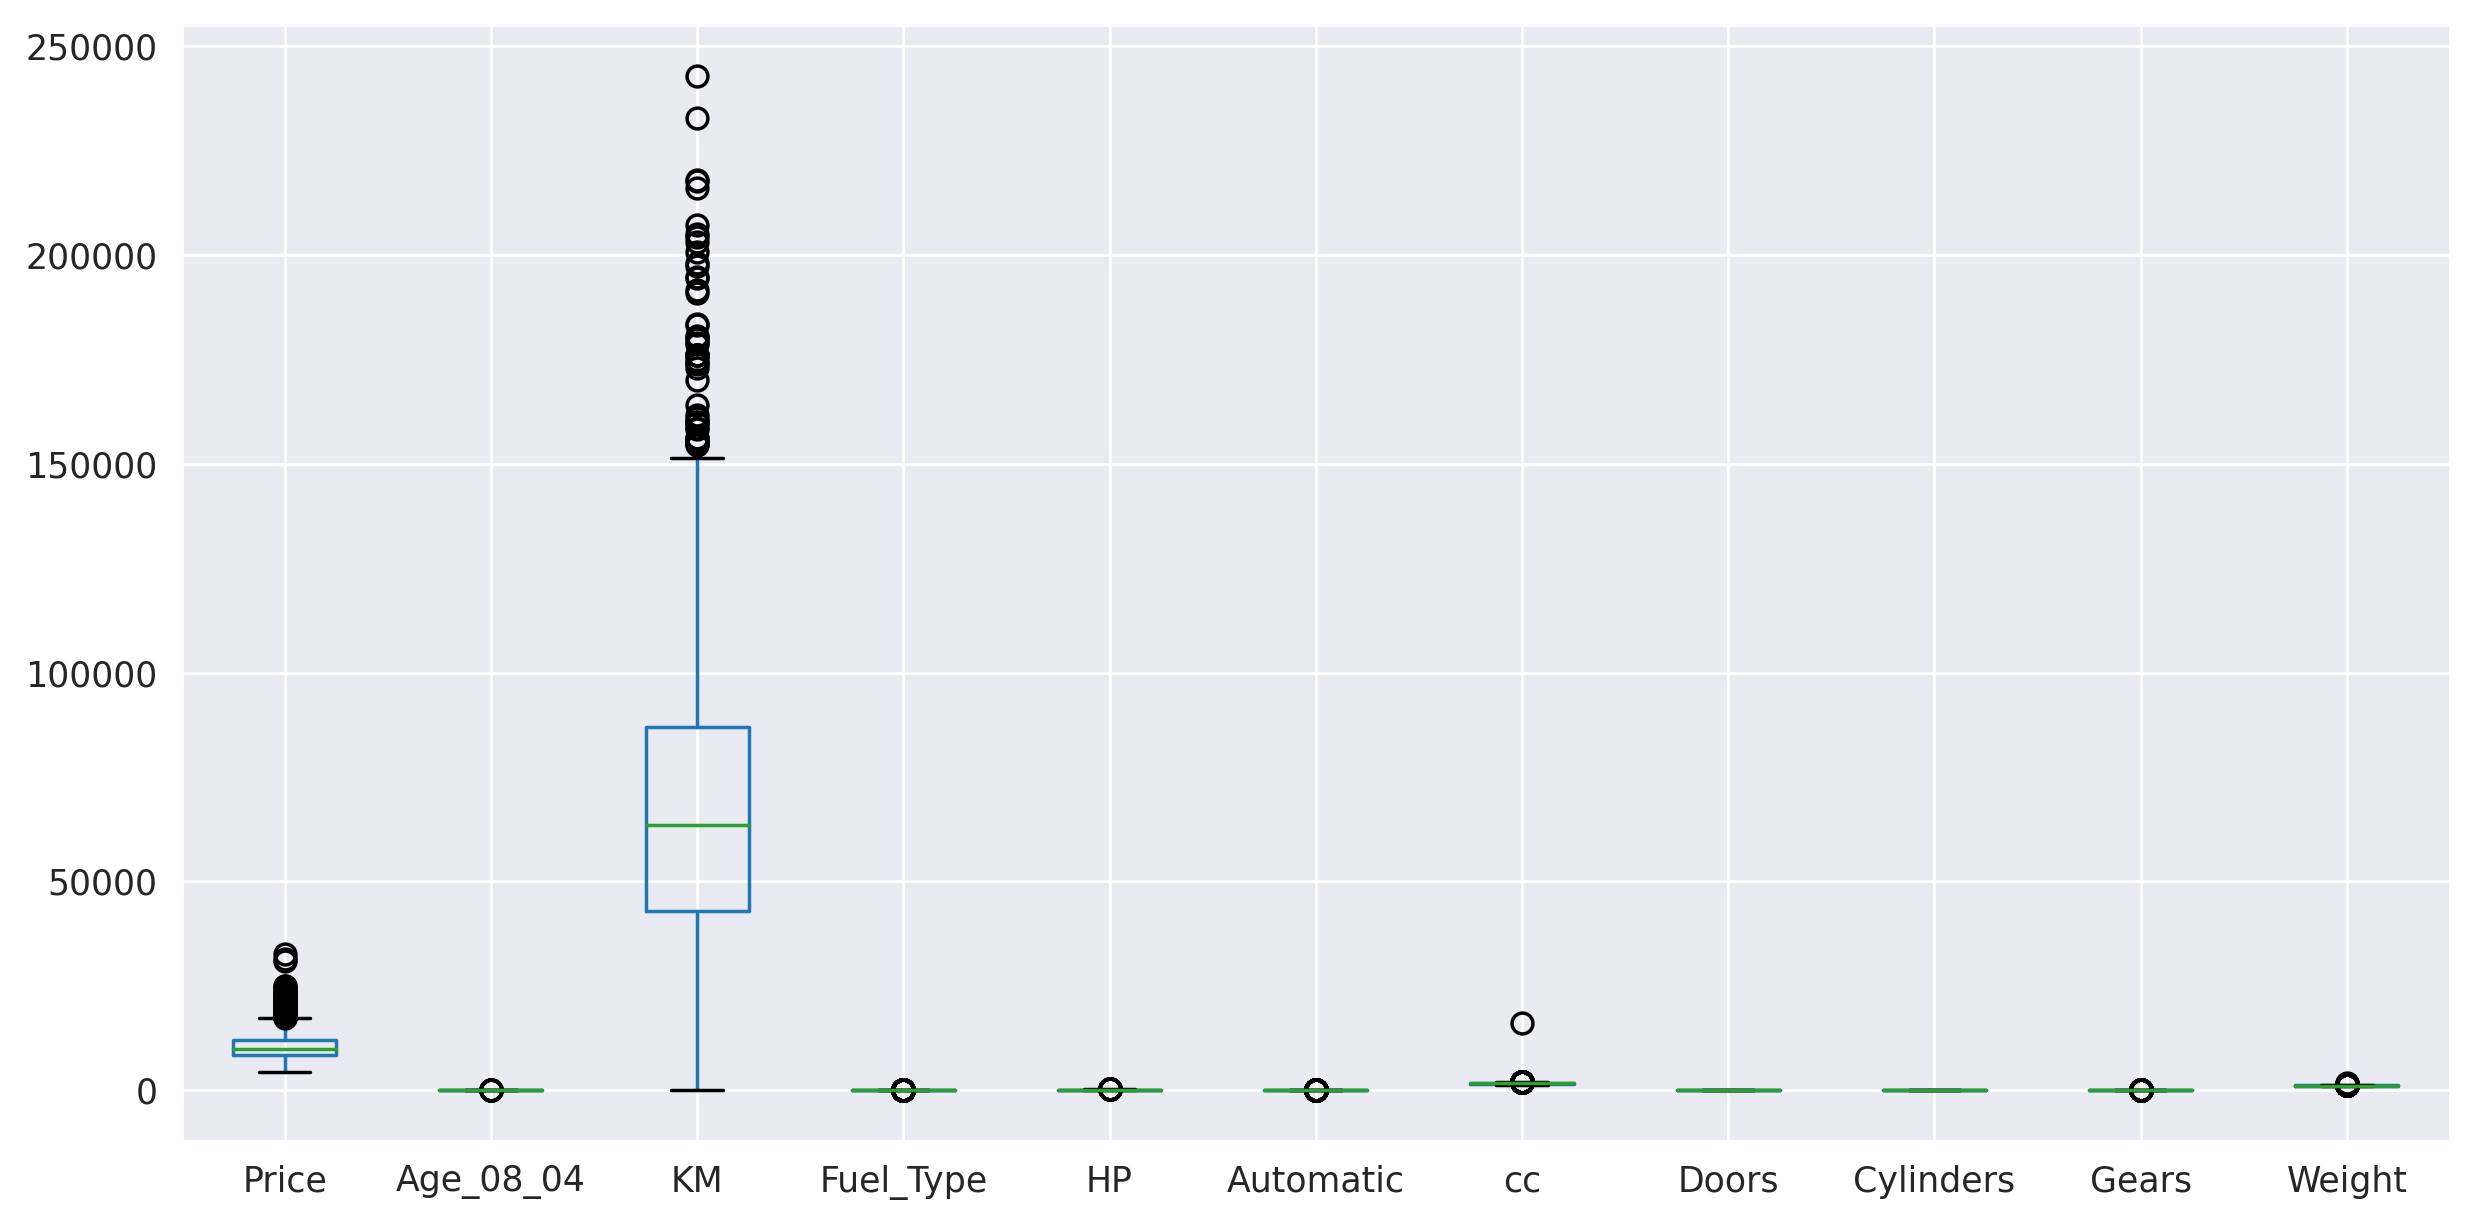

In [ ]:
df.boxplot()
plt.tight_layout()

In [ ]:
df.corr()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876273,-0.569420,-0.015883,0.314134,0.033928,0.124375,0.183604,NaN,0.063831,0.575869
Age_08_04,-0.876273,1.000000,0.504575,0.076382,-0.155293,0.031354,-0.096549,-0.146929,NaN,-0.005629,-0.466484
KM,-0.569420,0.504575,1.000000,-0.424118,-0.332904,-0.082168,0.103822,-0.035193,NaN,0.014890,-0.023969
Fuel_Type,-0.015883,0.076382,-0.424118,1.000000,0.411973,0.069456,-0.276236,-0.025339,NaN,0.069560,-0.502479
HP,0.314134,-0.155293,-0.332904,0.411973,1.000000,0.013313,0.035207,0.091803,NaN,0.209642,0.087143
Automatic,0.033928,0.031354,-0.082168,0.069456,0.013313,1.000000,0.066934,-0.027492,NaN,-0.098582,0.058499
cc,0.124375,-0.096549,0.103822,-0.276236,0.035207,0.066934,1.000000,0.079254,NaN,0.014732,0.335077
Doors,0.183604,-0.146929,-0.035193,-0.025339,0.091803,-0.027492,0.079254,1.000000,NaN,-0.160101,0.301734
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063831,-0.005629,0.014890,0.069560,0.209642,-0.098582,0.014732,-0.160101,NaN,1.000000,0.021238


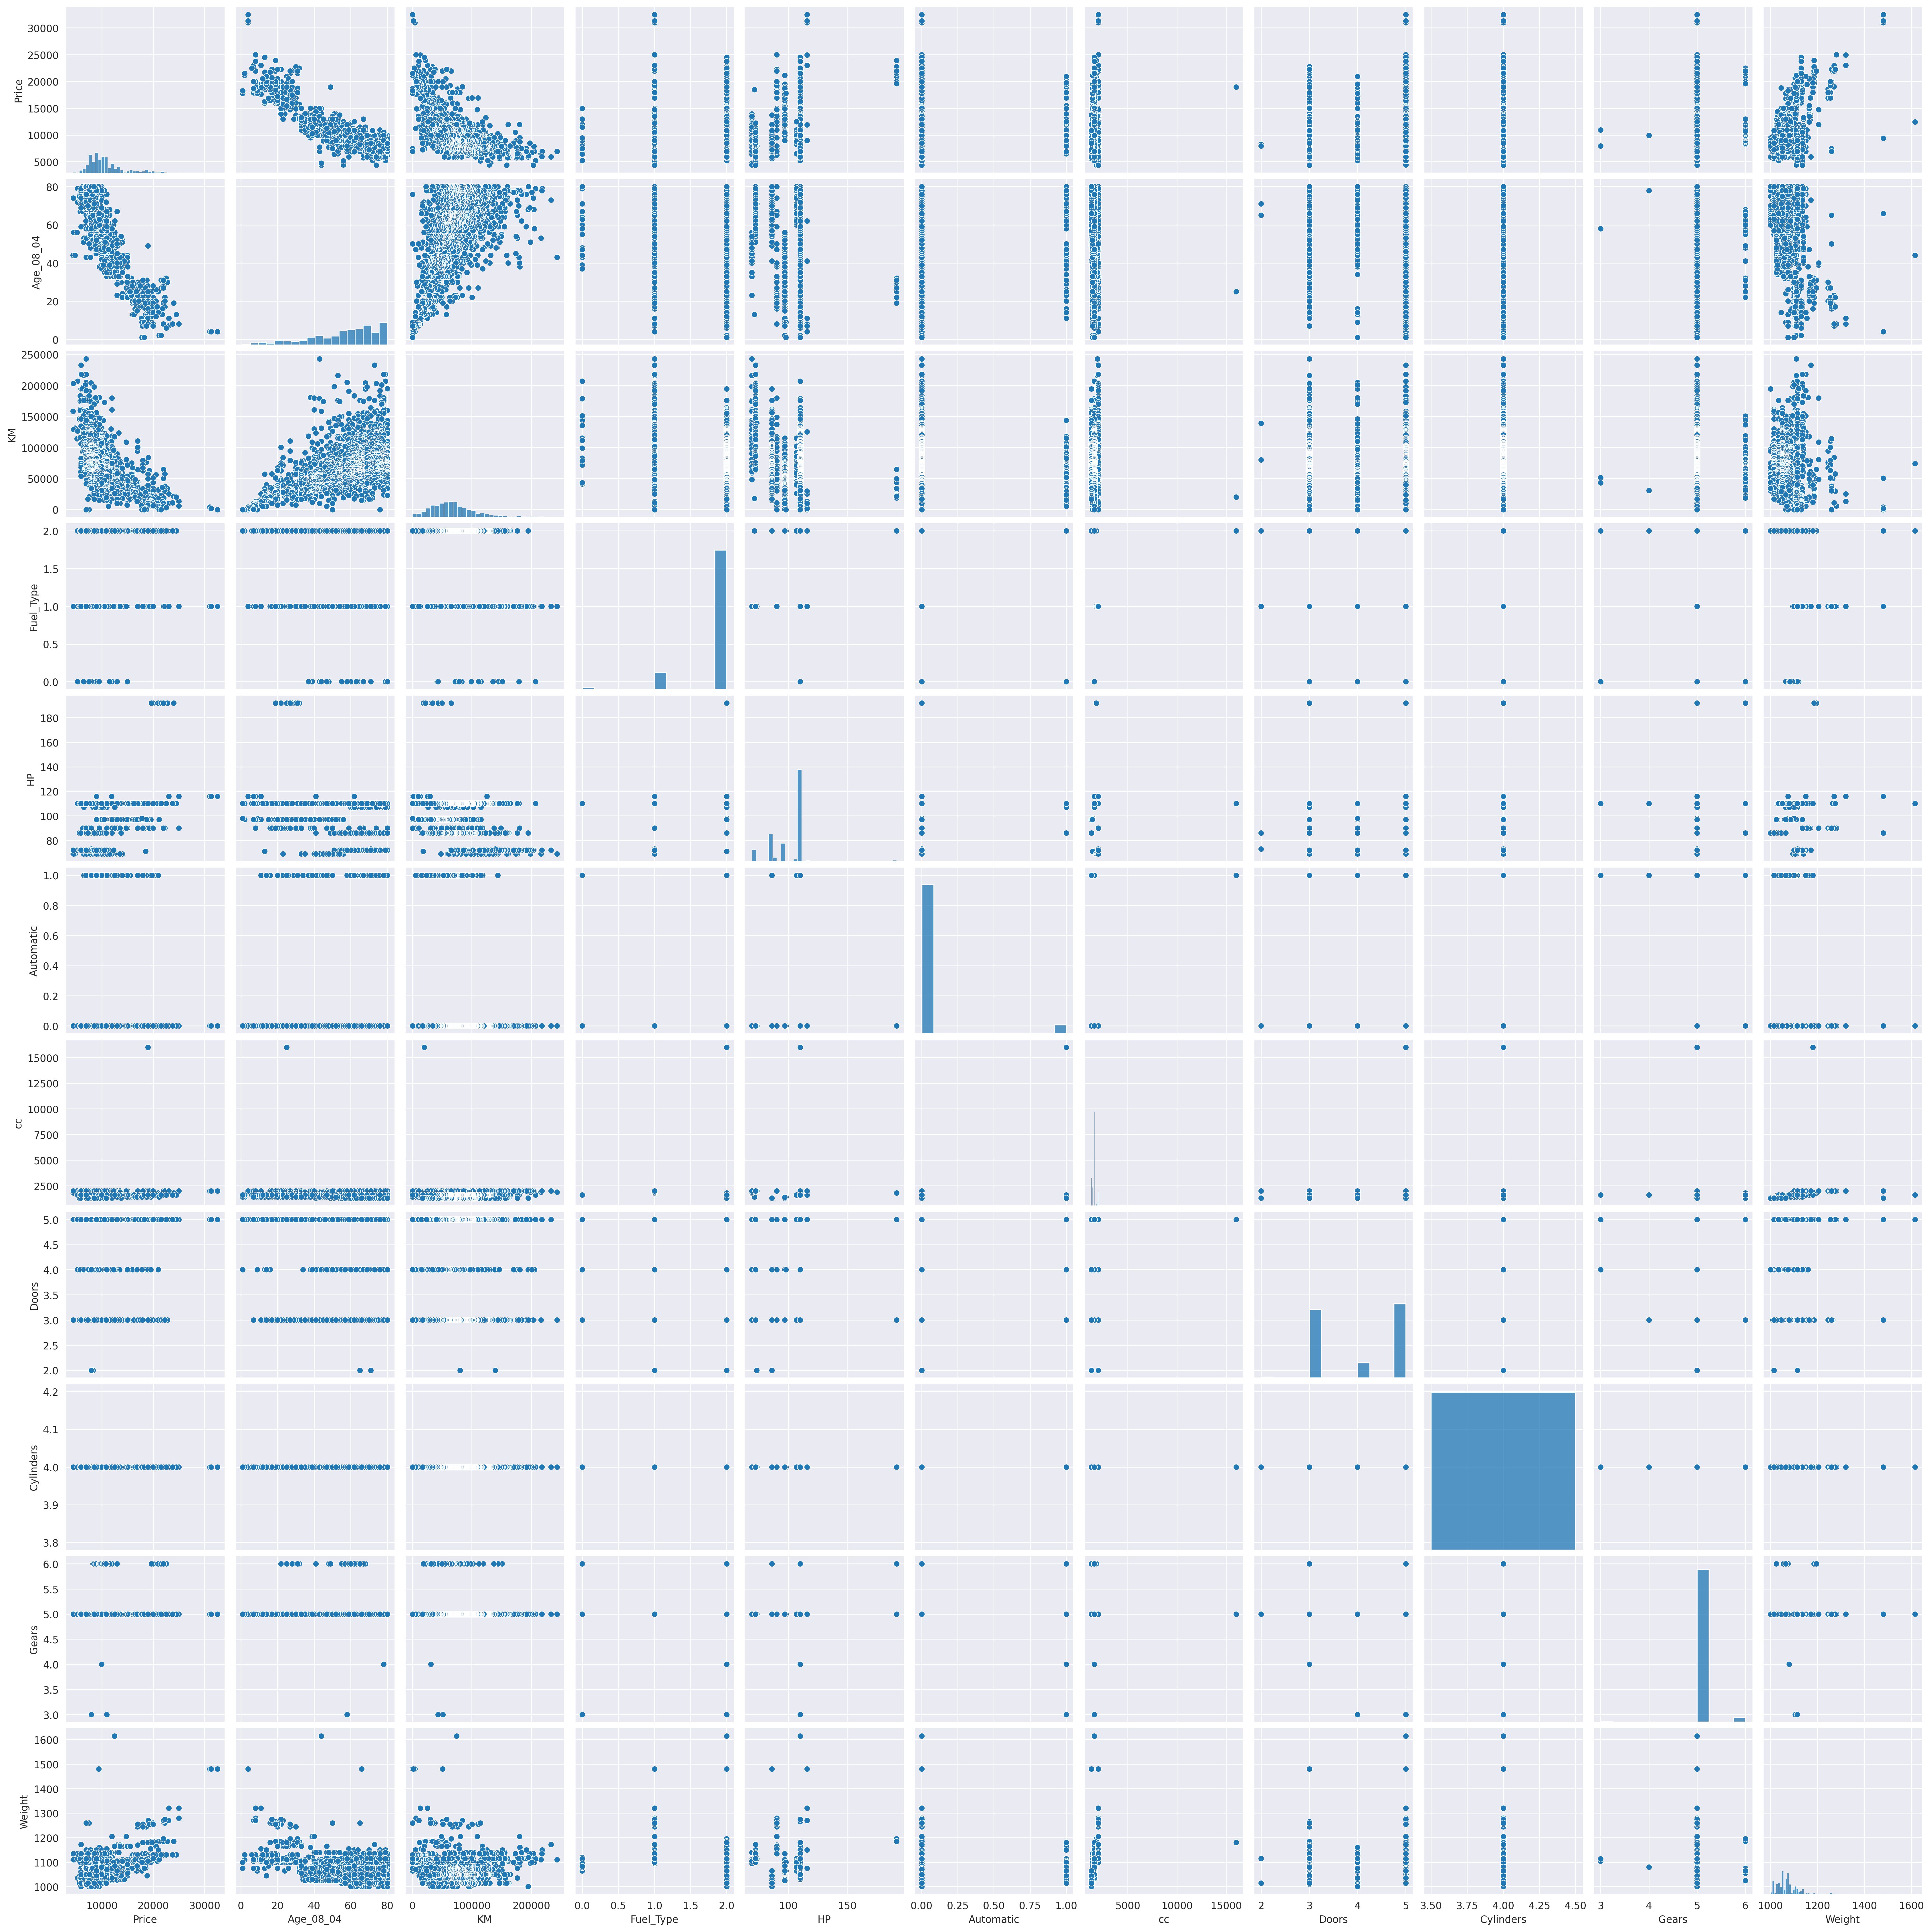

In [ ]:
sns.pairplot(df)

<Axes: >

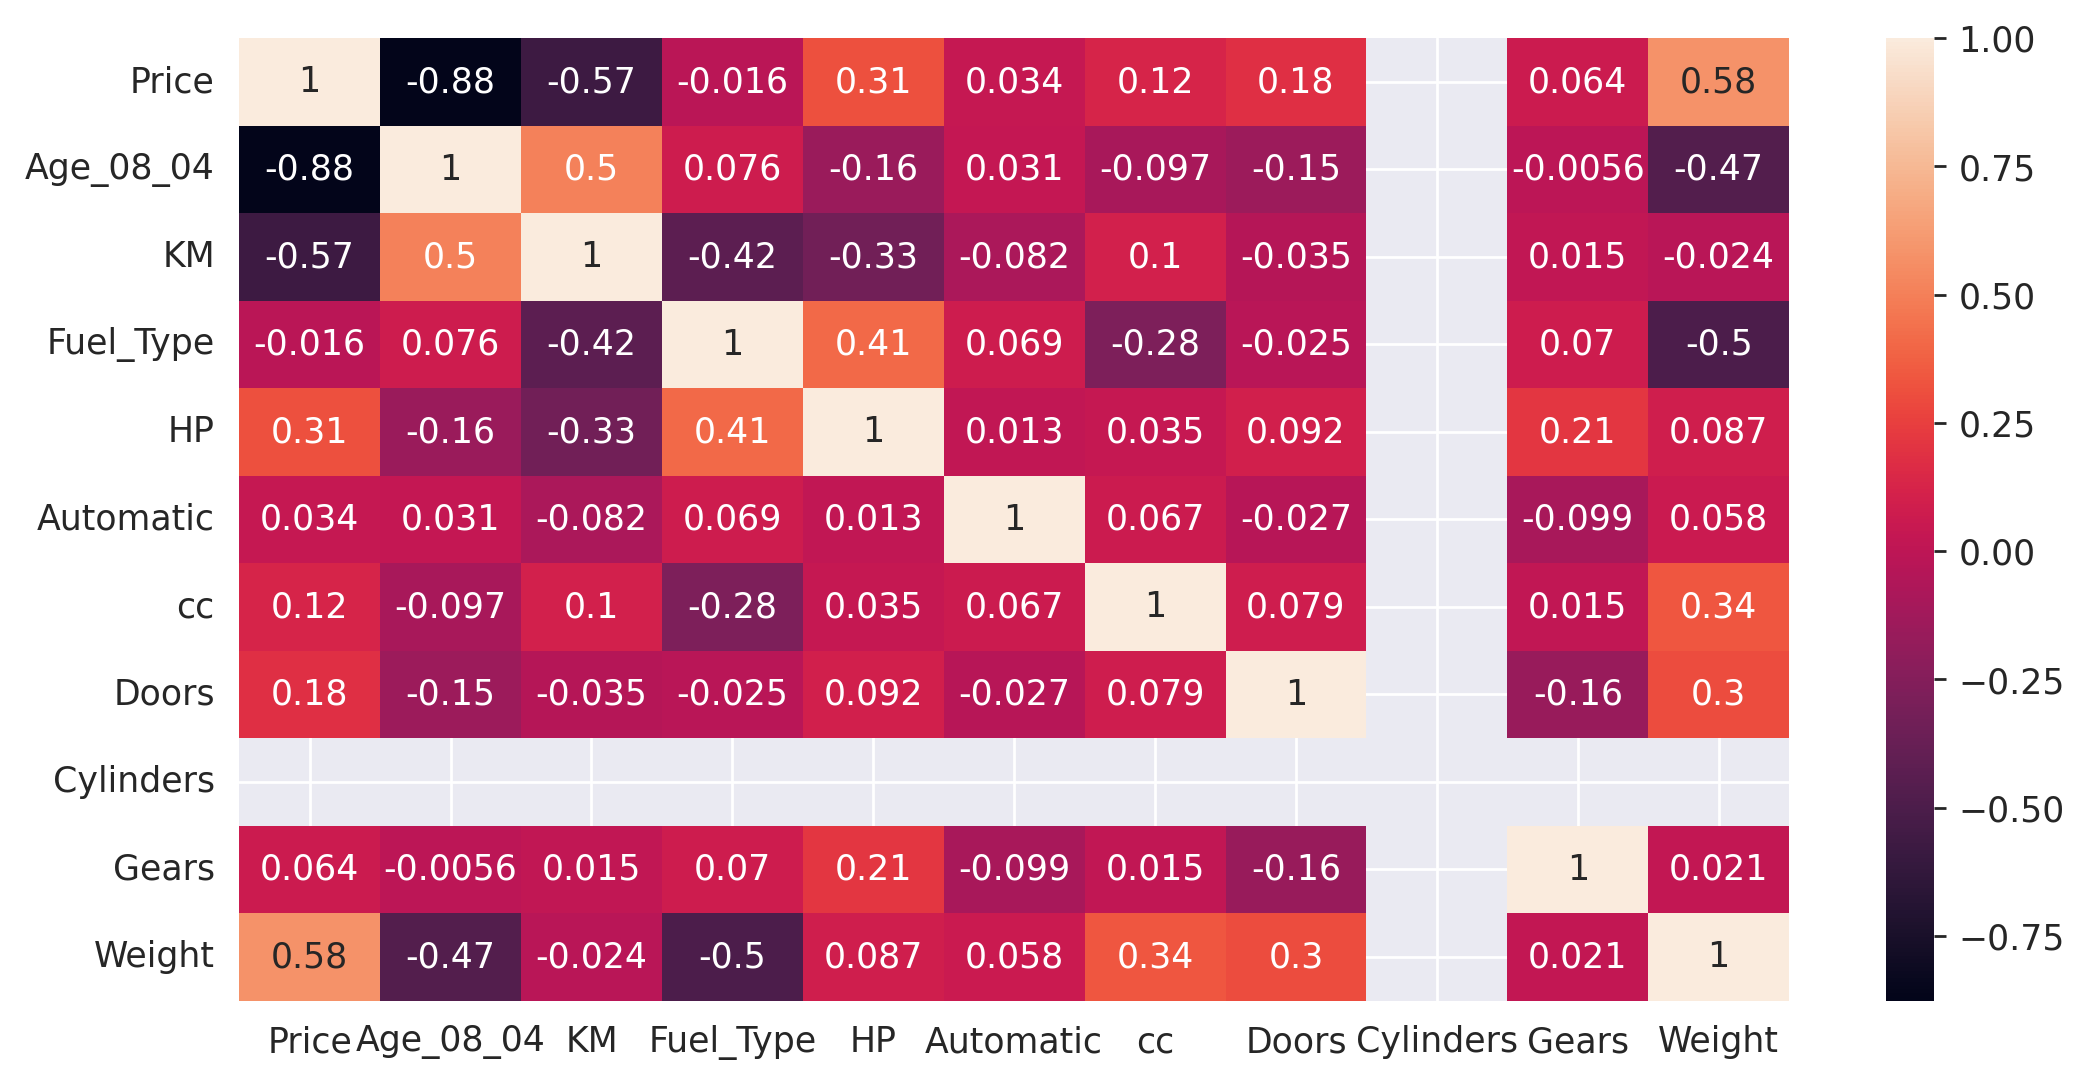

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
# @title MODEL BUILDING


In [ ]:
x=df.iloc[:,1:11]
y=df.iloc[:,0]

In [ ]:
df.columns.get_loc('Price')

0

In [ ]:
x


,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,23,46986,1,90,0,2000,3,4,5,1165
1,23,72937,1,90,0,2000,3,4,5,1165
2,24,41711,1,90,0,2000,3,4,5,1165
3,26,48000,1,90,0,2000,3,4,5,1165
4,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1430,69,20544,2,86,0,1300,3,4,5,1025
1431,72,19000,2,86,0,1300,3,4,5,1015
1432,71,17016,2,86,0,1300,3,4,5,1015
1433,70,16916,2,86,0,1300,3,4,5,1015


In [ ]:
y

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1430     7500
1431    10845
1432     8500
1433     7250
1434     6950
Name: Price, Length: 1435, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [35]:
x_train

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
988,59,43818,2,110,0,1600,5,4,5,1070
906,65,58829,2,110,0,1600,3,4,5,1050
1317,78,67255,2,110,0,1600,5,4,5,1085
817,62,70500,2,110,0,1600,5,4,5,1035
660,65,111769,2,110,0,1600,3,4,6,1065
...,...,...,...,...,...,...,...,...,...,...
715,60,89576,2,110,0,1600,4,4,5,1035
905,68,58860,2,110,0,1600,3,4,5,1055
1096,74,124910,1,72,0,2000,5,4,5,1135
235,44,60500,2,110,0,1600,5,4,5,1075


In [36]:
y_train

988      9950
906      8950
1317     8500
817      8950
660      9750
        ...  
715      8750
905      9750
1096     7250
235     10950
1061     6750
Name: Price, Length: 1148, dtype: int64

In [38]:
#linear regression model
lr=LinearRegression()
lr.fit(x_train,y_train)
ypred=lr.predict(x_test)
ypred

array([ 8451.82745034, 12528.9968043 , 14205.05633396,  7458.41314389,
       12967.08419329, 17647.0688047 , 10012.40548629,  7846.36023308,
       10351.78369242, 11525.64369495,  7745.13435484, 10625.32214353,
        8715.92914282,  9458.46302043, 10548.52890011,  7756.74840121,
        6059.14449642,  8806.67405437, 17159.91029403, 10883.13699372,
       16411.68625208,  8240.12745979,  9538.4877848 ,  6290.69339846,
       13778.14163507, 18609.84098787,  6695.33827403,  7756.0753779 ,
        1897.39067904, 11142.56862677,  7966.58730713,  8925.68649486,
       14227.24225558, 17090.45997238, 26425.50512009,  8829.18431653,
       12683.31728829,  7523.87156067,  8808.50859282, 20758.1798556 ,
        8454.6526654 ,  9885.20226298,  8834.31629512, 10136.40239885,
        8760.47495753,  9889.89051388,  9703.07412856,  9246.04224297,
        6541.54714394,  6477.82739996, 11000.89472669, 12505.90717031,
       11350.70397199,  9076.84604154,  7449.31671246, 19486.75553254,
      

In [39]:
lr.intercept_ #y_intercept

-7672.683129079296

In [40]:
lr.coef_  #coefficient/slope

array([-1.24704007e+02, -1.62150709e-02,  1.36746778e+02,  2.93541947e+01,
        3.67194593e+02, -1.12654651e+00, -2.38522534e+01, -1.08002496e-12,
        6.07363824e+02,  2.05506951e+01])

In [42]:
lr.score(x_train,y_train),lr.score(x_test,y_test) #calculating accuracy of the model

(0.859798706730614, 0.8136980992304201)

In [ ]:
#we got training accuracy as 85% and test accuracy as 81%

In [44]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [ ]:
# @title LASSO


In [83]:
l1=Lasso(alpha=2300)
l1.fit(x_train,y_train)
l1.predict(x_test)

array([ 8493.53351165, 12581.0162519 , 13756.5853322 ,  7806.65380166,
       12914.46921311, 17669.90765886,  9450.59635582,  7789.20940017,
       10343.5432529 , 11178.74529118,  7960.4518781 , 10358.50638197,
        8943.04302659,  9492.921813  , 10517.9815075 ,  8026.27042714,
        6005.57933062,  9088.80931048, 16972.27581295, 11006.21845922,
       16296.57358451,  8893.47337481,  9519.75856952,  6496.94846388,
       13675.49213833, 18760.75764763,  6789.02247045,  7889.08232186,
        8528.16630559, 10930.60695113,  7919.46680021,  8576.92723252,
       14058.4523535 , 16914.63136752, 26296.08969005,  9044.1201258 ,
       12766.61758441,  7596.61586216,  8680.4057247 , 19734.0541268 ,
        8731.03856945,  9164.43468914,  8824.22081121, 10093.66777968,
        8894.1035455 ,  9340.95178073, 10104.26281392,  9540.3818583 ,
        6775.45326036,  6777.25209987, 11028.8699907 , 11947.94068816,
       11112.67436195,  9247.2464249 ,  7502.04776771, 18776.71843325,
      

In [84]:
l1.score(x_train,y_train),l1.score(x_test,y_test) #score did not changed on default alpa value

(0.8535301587552098, 0.8508082213376559)

In [85]:
l1.coef_ #column having slope with 0 are not important

array([-1.12617038e+02, -2.20182443e-02,  0.00000000e+00,  1.86803834e+01,
        0.00000000e+00, -6.29140984e-01, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.02505121e+01])

In [86]:
x_train.columns #fueltype,automatic,doors,cylinders,gear are not important columns

Index(['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [ ]:
# @title RIDGE


In [87]:
l2=Ridge()
l2.fit(x_train,y_train)
l2.predict(x_test)

array([ 8452.64816166, 12532.8232634 , 14196.99738631,  7459.45972416,
       12967.28347513, 17647.62751354,  9997.32474765,  7848.24945624,
       10352.89833696, 11527.03986503,  7745.8854107 , 10625.80111799,
        8707.82431186,  9459.01394678, 10549.13773798,  7758.70582756,
        6059.28874259,  8807.44960853, 17161.15203907, 10882.6466396 ,
       16413.01548147,  8240.20910726,  9540.17645843,  6290.05087669,
       13778.24570455, 18611.74051561,  6696.36593707,  7756.97711993,
        1839.60550595, 11142.63191615,  7967.50159335,  8918.4154817 ,
       14227.29411677, 17091.93963793, 26429.60774034,  8830.0706285 ,
       12684.89871584,  7525.85914286,  8800.66096112, 20763.75538471,
        8454.71398312,  9870.13868314,  8835.20500348, 10135.3337777 ,
        8761.37047711,  9874.82408673,  9702.59562727,  9245.61919615,
        6541.44461859,  6478.87803065, 11001.52680246, 12506.16771472,
       11343.26874317,  9077.65311726,  7450.10490849, 19480.4615737 ,
      

In [88]:
l2.score(x_train,y_train),l2.score(x_test,y_test)

(0.8597978004374822, 0.8132389070575765)

In [100]:
l2.coef_

array([-1.23516933e+02, -1.64583534e-02,  1.02277103e+01,  3.20825965e+01,
        2.03914174e+01, -1.31488178e+00, -2.54558689e+01,  0.00000000e+00,
        2.61059262e+01,  2.07758991e+01])